In [1]:
from datetime import datetime
import yfinance as yf
import mplfinance as mpf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [2]:
#reading 500 stocks in S&P500

sp500 = pd.read_csv('sp500_stocks.csv', header=1)

In [3]:
sp500.head(5)

#                       Company Symbol
0  1                Microsoft Corp   MSFT
1  2                    Apple Inc.   AAPL
2  3                   Nvidia Corp   NVDA
3  4                Amazon.com Inc   AMZN
4  5  Meta Platforms, Inc. Class A   META

In [4]:
len(sp500['Symbol'].unique())

503

## Data download

In [6]:
sym_list  = sp500['Symbol'].str.strip()

In [7]:
startdate= datetime(2019, 5, 1)
enddate = datetime(2024, 5, 1)

def fetch_data(sym):
    data = yf.download(sym,start=startdate, end=enddate)
    data['ticker']=sym
    return data
    
    
all_data = pd.DataFrame()

for sym in sym_list:
    try:
        data = fetch_data(sym)
        all_data = all_data.append(data)
    except Exception as e:
        print (f"could not fetch data for {sym}: {e}")
        
all_data.to_csv("sp500_historical_data.csv")
    

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%*************

$BF.B: possibly delisted; No price data found  (1d 2019-05-01 00:00:00 -> 2024-05-01 00:00:00)



/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/2929200157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data)
[*********************100%%**********************]  1 of 1 completed
/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yf

## Reading stock data

In [8]:
hist = pd.read_csv('sp500_historical_data.csv')

In [9]:
hist

Date        Open        High         Low       Close  \
0       2019-05-01  130.529999  130.649994  127.699997  127.879997   
1       2019-05-02  127.980003  128.000000  125.519997  126.209999   
2       2019-05-03  127.360001  129.429993  127.250000  128.899994   
3       2019-05-06  126.389999  128.559998  126.110001  128.149994   
4       2019-05-07  126.459999  127.180000  124.220001  125.519997   
...            ...         ...         ...         ...         ...   
623676  2024-04-24   25.410000   25.540001   25.250000   25.330000   
623677  2024-04-25   25.100000   25.270000   24.719999   24.940001   
623678  2024-04-26   24.870001   25.049999   24.690001   24.959999   
623679  2024-04-29   25.040001   25.309999   24.959999   24.990000   
623680  2024-04-30   24.870001   24.969999   24.360001   24.540001   

         Adj Close      Volume ticker  
0       121.508835  26821700.0   MSFT  
1       119.922020  27350200.0   MSFT  
2       122.477997  24911100.0   MSFT  
3       121.765358  24239800.0   MSFT  
4       119.266396  36017700.0   MSFT  
...            ...         ...    ...  
623676   25.330000    629100.0    NWS  
623677   24.940001    611500.0    NWS  
623678   24.959999    485800.0    NWS  
623679   24.990000    704400.0    NWS  
623680   24.540001    888800.0    NWS  

[623681 rows x 8 columns]

In [10]:
max_date = hist['Date'].max()
min_date = hist['Date'].min()

print (min_date, max_date)

2019-05-01 2024-04-30


In [11]:
hist_2y = hist[hist['Date']>='2022-04-30']

In [12]:
hist_2y.reset_index()
hist_2y.set_index('Date', inplace=True)

In [13]:
hist_2y.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
ticker        object
dtype: object

## RSI 
(Relative Strength Index): A momentum oscillator that measures the speed and change of price movements.

In [14]:
def rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

In [15]:
grouped = hist_2y.groupby('ticker')

In [16]:
feature_df = pd.DataFrame()

for name, group in grouped:
    
    # Handle missing values
    group = group.fillna(method='ffill')  # Forward fill missing values
    if group.isnull().any().any():  # If there are still NaNs after forward fill
        group = group.fillna(method='bfill')  # Backward fill remaining missing values
    
    # RSI
    group['RSI'] = rsi(group['Adj Close'])
    
    feature_df = pd.concat([feature_df, group])



In [17]:
feature_df.head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-02  118.379997  120.339996  116.489998  119.570000  117.925140   
2022-05-03  119.720001  123.980003  119.089996  122.400002  120.716209   
2022-05-04  121.690002  126.690002  121.440002  126.300003  124.562569   
2022-05-05  124.620003  125.209999  120.800003  122.150002  120.469635   
2022-05-06  120.879997  121.879997  118.000000  121.080002  119.414360   
2022-05-09  119.129997  119.129997  112.639999  113.110001  111.554008   
2022-05-10  115.440002  117.940002  113.139999  116.639999  115.035439   
2022-05-11  115.699997  118.000000  113.839996  113.989998  112.421898   
2022-05-12  113.610001  116.250000  112.779999  116.129997  114.532471   
2022-05-13  117.379997  120.720001  117.269997  119.379997  117.737747   
2022-05-16  119.629997  121.029999  118.830002  120.300003  118.645096   
2022-05-17  122.699997  123.699997  121.449997  123.080002  121.386848   
2022-05-18  121.190002  121.910004  120.309998  120.790001  119.128365   
2022-05-19  120.309998  123.580002  119.529999  122.400002  120.716209   
2022-05-20  124.029999  125.580002  122.440002  125.129997  123.408638   
2022-05-23  126.449997  126.470001  123.760002  125.980003  124.246964   
2022-05-24  125.320000  126.000000  123.800003  124.410004  122.698555   
2022-05-25  127.209999  127.459999  119.180000  120.379997  118.723991   
2022-05-26  120.750000  124.220001  120.720001  123.849998  122.146255   
2022-05-27  124.919998  130.770004  124.489998  130.550003  128.754105   

               Volume ticker        RSI  
Date                                     
2022-05-02  1756200.0      A        NaN  
2022-05-03  3217800.0      A        NaN  
2022-05-04  2460400.0      A        NaN  
2022-05-05  2123600.0      A        NaN  
2022-05-06  1629000.0      A        NaN  
2022-05-09  1861700.0      A        NaN  
2022-05-10  2141800.0      A        NaN  
2022-05-11  1607000.0      A        NaN  
2022-05-12  1338000.0      A        NaN  
2022-05-13  1328400.0      A        NaN  
2022-05-16  2011600.0      A        NaN  
2022-05-17  2216200.0      A        NaN  
2022-05-18  1336000.0      A        NaN  
2022-05-19  2310100.0      A  53.619853  
2022-05-20  2594600.0      A  56.647523  
2022-05-23  2037000.0      A  54.492977  
2022-05-24  2187700.0      A  47.480652  
2022-05-25  3524500.0      A  47.633064  
2022-05-26  1768000.0      A  53.480779  
2022-05-27  2698800.0      A  72.637609

In [18]:
feature_df_n = feature_df.drop(labels = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1)

In [19]:
pivot_feature_df_n = feature_df_n.pivot_table(index='ticker', columns='Date', 
                                              values=['RSI'])


In [20]:
pivot_feature_df_n

RSI                                                         \
Date   2022-05-19 2022-05-20 2022-05-23 2022-05-24 2022-05-25 2022-05-26   
ticker                                                                     
A       53.619853  56.647523  54.492977  47.480652  47.633064  53.480779   
AAL     40.109296  38.070547  37.552310  30.038759  37.791279  47.081710   
AAPL    32.833429  33.103895  37.313809  28.754635  34.213601  37.326309   
ABBV    61.370337  58.900158  45.844237  43.103556  49.456572  44.613944   
ABNB    28.651990  28.147742  31.341169  19.119460  27.276518  34.295715   
...           ...        ...        ...        ...        ...        ...   
XYL     50.204621  49.763342  48.084081  31.252872  36.879533  47.654567   
YUM     37.612306  42.417065  47.644178  40.539408  49.931847  56.019459   
ZBH     43.452383  44.805191  50.231127  37.734514  43.140397  50.666676   
ZBRA    28.778019  29.463463  37.139115  34.099102  39.700435  45.987313   
ZTS     27.190034  34.510128  34.459822  31.532508  36.843795  44.927973   

                                                    ...                        \
Date   2022-05-27 2022-05-31 2022-06-01 2022-06-02  ... 2024-04-17 2024-04-18   
ticker                                              ...                         
A       72.637609  64.376000  61.432155  64.850006  ...  26.661255  26.413314   
AAL     59.378236  56.728786  56.846478  60.557343  ...  33.718246  34.920635   
AAPL    47.755081  44.574154  52.490422  60.074580  ...  40.661281  41.944832   
ABBV    47.560939  38.857367  36.741091  31.875013  ...  24.131668  20.351693   
ABNB    50.968957  54.274898  50.478429  54.162755  ...  38.347814  43.013228   
...           ...        ...        ...        ...  ...        ...        ...   
XYL     52.771780  54.428389  57.708024  59.426158  ...  36.449339  41.653253   
YUM     74.134108  75.371595  74.635846  73.792595  ...  51.939108  46.711651   
ZBH     62.390983  65.861335  65.244542  70.677741  ...  21.453770  20.094525   
ZBRA    56.088048  54.910540  58.492160  61.823142  ...  30.681442  26.485680   
ZTS     66.369745  63.035245  60.814152  63.579881  ...  25.007559  27.003756   

                                                                          \
Date   2024-04-19 2024-04-22 2024-04-23 2024-04-24 2024-04-25 2024-04-26   
ticker                                                                     
A       26.424085  30.999999  42.888536  43.824198  36.868849  38.998025   
AAL     35.360357  51.688313  50.895137  51.156814  54.590570  49.758460   
AAPL    41.065700  44.604299  45.098029  50.340820  50.526325  51.470075   
ABBV    26.516531  30.410278  38.494945  53.800785  46.760627  32.797726   
ABNB    39.080463  45.221194  52.002986  54.810003  51.597102  55.137507   
...           ...        ...        ...        ...        ...        ...   
XYL     46.810187  53.267504  56.567840  63.571493  60.051574  68.009371   
YUM     40.768498  42.493163  55.275963  79.699189  79.104302  87.600281   
ZBH     22.870615  29.858522  26.790564  30.265564  28.193288  28.588057   
ZBRA    24.641925  30.567277  37.578635  38.298199  51.372044  50.222104   
ZTS     23.889993  24.558101  33.539940  31.407292  35.056240  42.468430   

                              
Date   2024-04-29 2024-04-30  
ticker                        
A       36.740234  37.621676  
AAL     50.357992  51.213597  
AAPL    56.005017  53.843847  
ABBV    36.748999  40.930564  
ABNB    49.462361  47.831611  
...           ...        ...  
XYL     65.352450  59.602185  
YUM     87.034627  67.665876  
ZBH     27.099460  27.509052  
ZBRA    45.602511  59.351459  
ZTS     42.256238  45.788118  

[501 rows x 489 columns]

## Clustering
Using Tslearn

In [21]:
pivot_feature_df_n.isnull().sum().sum()

1729

In [22]:
pivot_feature_df_n[np.isnan(pivot_feature_df_n)]=0

In [23]:
# Normalize the data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
data_normalized = scaler.fit_transform(pivot_feature_df_n.values)


In [24]:
data_normalized.shape


(501, 489, 1)

When you pass a 2D array (like a typical DataFrame converted to numpy values using df.values), it is commonly shaped as (samples, features). For tslearn's TimeSeriesScalerMeanVariance, the input needs to be at least 3D, even if each time series is univariate (i.e., only one variable measured at each timepoint). Hence, if you input a 2D array with shape (n_samples, n_features), the scaler transforms this into a 3D array with shape (n_samples, n_features, 1). Each feature in your original array is treated as a univariate time series.

## Optimal k value

In [26]:

# Determine the optimal number of clusters using the elbow method
data_3d = data_normalized

inertia = []
silhouette_scores = []
k_values = range(2, 10)  # You can adjust the range of k values to test

for k in k_values:
    tsmodel = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=0)
    labels = tsmodel.fit_predict(data_3d)
    inertia.append(tsmodel.inertia_)
    print (f'cluster {k} done, inertia : {tsmodel.inertia_}')

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



KeyboardInterrupt: 

In [93]:
inertia

[51.132073540073165,
 48.6843050679875,
 47.10992789367985,
 46.53978451983612,
 46.082400649098965,
 45.50341002116961,
 44.726875605569646,
 44.394171229884506]

## Clustering using 4 clusters

In [27]:

model = TimeSeriesKMeans(n_clusters=4, metric="dtw",
                         max_iter=10, random_state=100)
labels = model.fit_predict(data_normalized)


In [29]:
print("Inertia (WCSS):", model.inertia_)

Inertia (WCSS): 47.38378857326638


In [30]:
pivot_feature_df_n['cluster']=labels

In [31]:
pivot_feature_df_n['cluster'].unique()

array([1, 2, 0, 3])

In [32]:
#save csv

pivot_feature_df_n.to_csv('sp500_tscluster_rsi.csv', index=True)

In [33]:
pivot_feature_df_n

RSI                                                         \
Date   2022-05-19 2022-05-20 2022-05-23 2022-05-24 2022-05-25 2022-05-26   
ticker                                                                     
A       53.619853  56.647523  54.492977  47.480652  47.633064  53.480779   
AAL     40.109296  38.070547  37.552310  30.038759  37.791279  47.081710   
AAPL    32.833429  33.103895  37.313809  28.754635  34.213601  37.326309   
ABBV    61.370337  58.900158  45.844237  43.103556  49.456572  44.613944   
ABNB    28.651990  28.147742  31.341169  19.119460  27.276518  34.295715   
...           ...        ...        ...        ...        ...        ...   
XYL     50.204621  49.763342  48.084081  31.252872  36.879533  47.654567   
YUM     37.612306  42.417065  47.644178  40.539408  49.931847  56.019459   
ZBH     43.452383  44.805191  50.231127  37.734514  43.140397  50.666676   
ZBRA    28.778019  29.463463  37.139115  34.099102  39.700435  45.987313   
ZTS     27.190034  34.510128  34.459822  31.532508  36.843795  44.927973   

                                                    ...                        \
Date   2022-05-27 2022-05-31 2022-06-01 2022-06-02  ... 2024-04-18 2024-04-19   
ticker                                              ...                         
A       72.637609  64.376000  61.432155  64.850006  ...  26.413314  26.424085   
AAL     59.378236  56.728786  56.846478  60.557343  ...  34.920635  35.360357   
AAPL    47.755081  44.574154  52.490422  60.074580  ...  41.944832  41.065700   
ABBV    47.560939  38.857367  36.741091  31.875013  ...  20.351693  26.516531   
ABNB    50.968957  54.274898  50.478429  54.162755  ...  43.013228  39.080463   
...           ...        ...        ...        ...  ...        ...        ...   
XYL     52.771780  54.428389  57.708024  59.426158  ...  41.653253  46.810187   
YUM     74.134108  75.371595  74.635846  73.792595  ...  46.711651  40.768498   
ZBH     62.390983  65.861335  65.244542  70.677741  ...  20.094525  22.870615   
ZBRA    56.088048  54.910540  58.492160  61.823142  ...  26.485680  24.641925   
ZTS     66.369745  63.035245  60.814152  63.579881  ...  27.003756  23.889993   

                                                                          \
Date   2024-04-22 2024-04-23 2024-04-24 2024-04-25 2024-04-26 2024-04-29   
ticker                                                                     
A       30.999999  42.888536  43.824198  36.868849  38.998025  36.740234   
AAL     51.688313  50.895137  51.156814  54.590570  49.758460  50.357992   
AAPL    44.604299  45.098029  50.340820  50.526325  51.470075  56.005017   
ABBV    30.410278  38.494945  53.800785  46.760627  32.797726  36.748999   
ABNB    45.221194  52.002986  54.810003  51.597102  55.137507  49.462361   
...           ...        ...        ...        ...        ...        ...   
XYL     53.267504  56.567840  63.571493  60.051574  68.009371  65.352450   
YUM     42.493163  55.275963  79.699189  79.104302  87.600281  87.034627   
ZBH     29.858522  26.790564  30.265564  28.193288  28.588057  27.099460   
ZBRA    30.567277  37.578635  38.298199  51.372044  50.222104  45.602511   
ZTS     24.558101  33.539940  31.407292  35.056240  42.468430  42.256238   

                  cluster  
Date   2024-04-30          
ticker                     
A       37.621676       1  
AAL     51.213597       2  
AAPL    53.843847       2  
ABBV    40.930564       0  
ABNB    47.831611       2  
...           ...     ...  
XYL     59.602185       1  
YUM     67.665876       1  
ZBH     27.509052       1  
ZBRA    59.351459       2  
ZTS     45.788118       2  

[501 rows x 490 columns]

In [34]:
#saving model pickle file

import pickle

with open('ts_kmeans_rsi_cluster5.pkl','wb') as f:
    pickle.dump(model, f)

In [ ]:
# Load the model from the file
#with open('ts_kmeans_rsi_cluster5.pkl', 'rb') as f:
#    loaded_model = pickle.load(f)

# Now `loaded_model` is ready to use


## Plots

In [35]:
pivot_feature_df_n_c0 = pivot_feature_df_n[pivot_feature_df_n['cluster']==0]
pivot_feature_df_n_c1 = pivot_feature_df_n[pivot_feature_df_n['cluster']==1]
pivot_feature_df_n_c2 = pivot_feature_df_n[pivot_feature_df_n['cluster']==2]
pivot_feature_df_n_c3 = pivot_feature_df_n[pivot_feature_df_n['cluster']==3]

In [36]:
c0 = pivot_feature_df_n[pivot_feature_df_n['cluster']==0].index.tolist()
c1 = pivot_feature_df_n[pivot_feature_df_n['cluster']==1].index.tolist()
c2 = pivot_feature_df_n[pivot_feature_df_n['cluster']==2].index.tolist()
c3 = pivot_feature_df_n[pivot_feature_df_n['cluster']==3].index.tolist()

In [37]:
print("c0 has len : ",len(c0))
print("c1 has len : ",len(c1))
print("c2 has len : ",len(c2))
print("c3 has len : ",len(c3))

c0 has len :  156
c1 has len :  195
c2 has len :  145
c3 has len :  5


In [39]:
hist_reset = hist_2y.reset_index()
stock_close = hist_reset[['Date','Adj Close','ticker']]
stock_close['Date'] = pd.to_datetime(stock_close['Date'])

/var/folders/gz/1r0ckjqd5xd6x4fsy9f35yfm0000gn/T/ipykernel_28295/743880200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_close['Date'] = pd.to_datetime(stock_close['Date'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


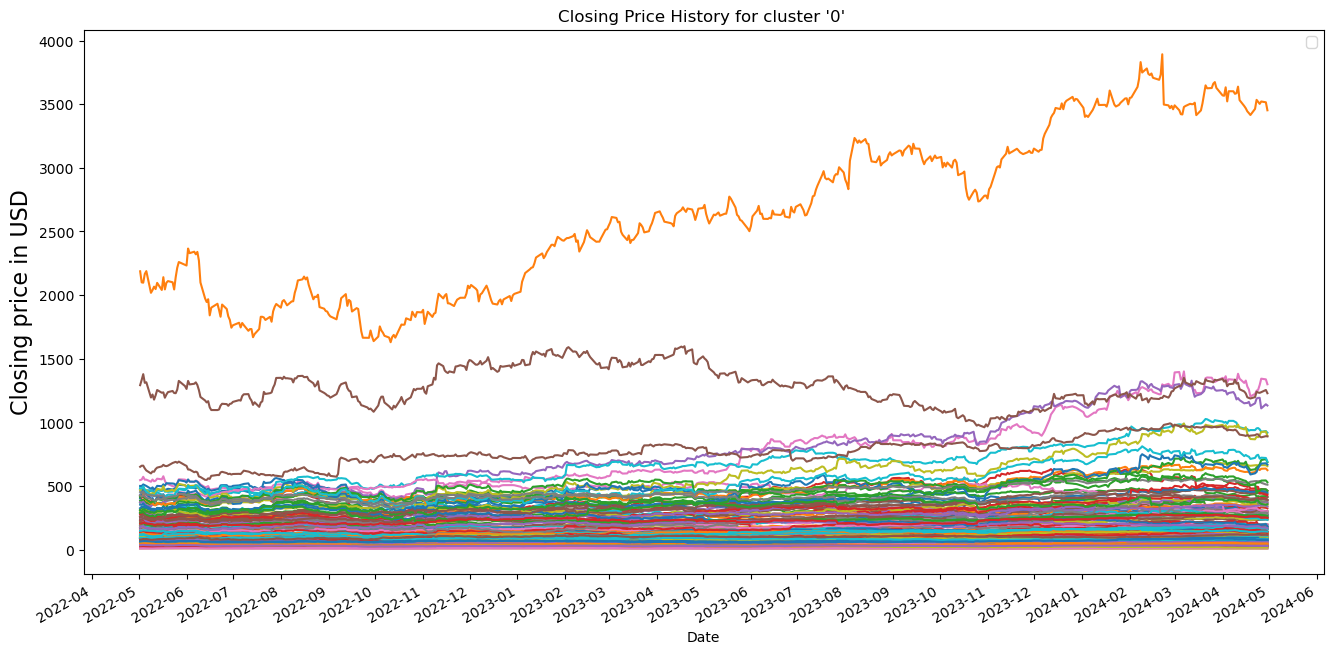

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


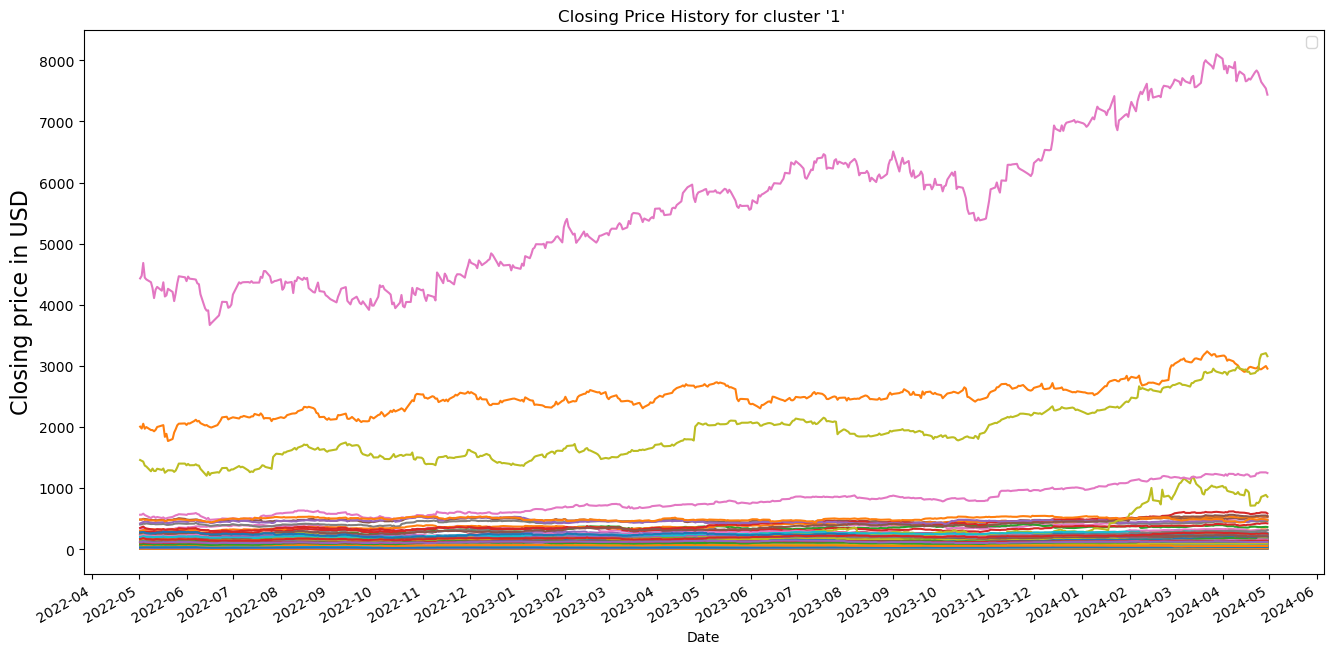

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


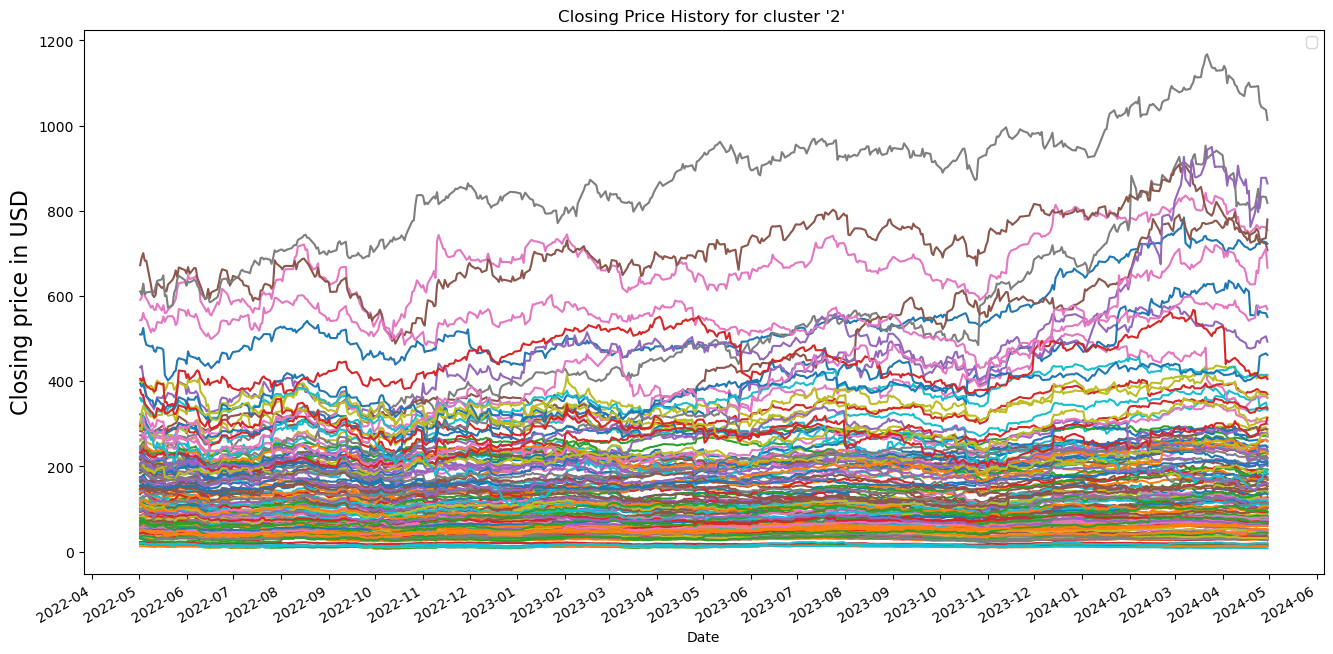

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


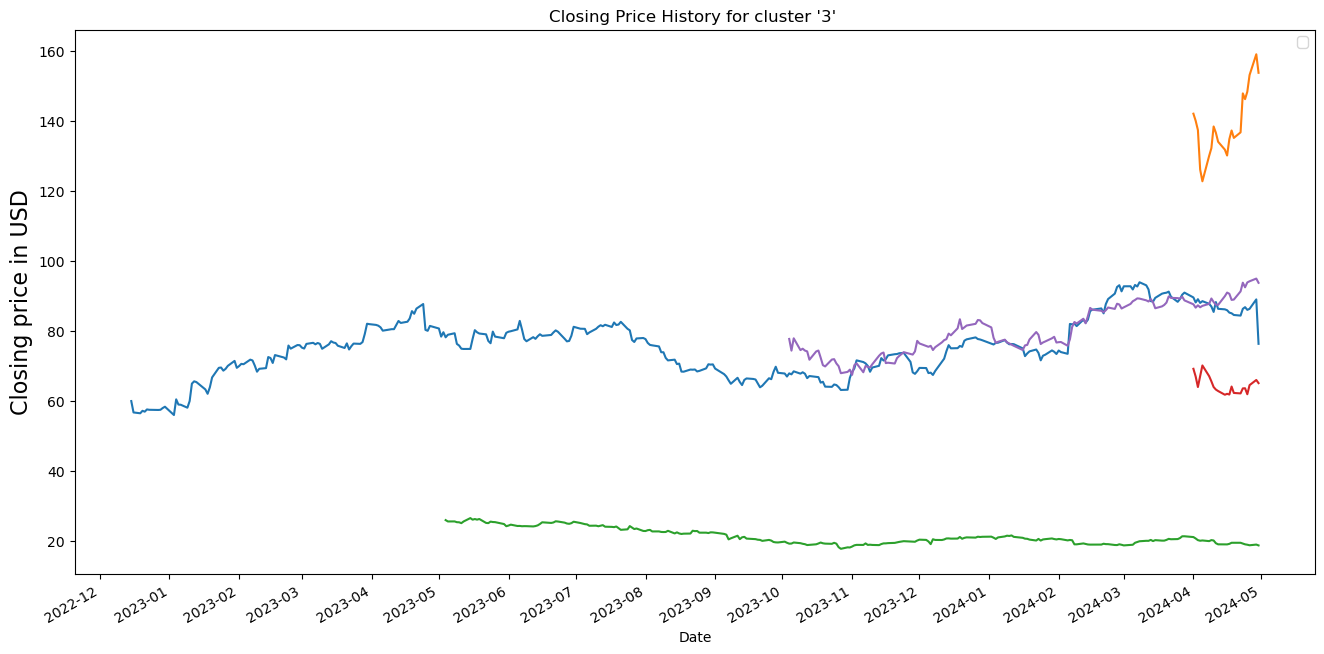

In [40]:
# Visualize growth price history for all clusters

import matplotlib.dates as mdates

clusters = [c0,c1,c2,c3]

for i in range(0, 4):
    plt.figure(figsize=(16,8))
    plt.title (f"Closing Price History for cluster '{i}' ")   
    for ticker in clusters[i]:
        plt.plot(stock_close[stock_close['ticker']==ticker]['Date'],
                 stock_close[stock_close['ticker']==ticker]['Adj Close'])
        #label=ticker
         
        
    # Formatting the date on the x-axis to include month and year
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at the start of each month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date to show the year and month

    plt.xlabel('Date')
    plt.ylabel('Closing price in USD', fontsize=16)
    plt.legend()
    plt.gcf().autofmt_xdate()
    #plt.savefig('../static/Images/his_'+ticker+'.png')
    plt.show()


### RSI plots

- to be ignored for now, jump to PCA visualisation

see what range of values of rsi each cluster has

In [130]:
feature_df_n

ticker        RSI
Date                        
2022-05-02      A        NaN
2022-05-03      A        NaN
2022-05-04      A        NaN
2022-05-05      A        NaN
2022-05-06      A        NaN
...           ...        ...
2024-04-24    ZTS  31.407292
2024-04-25    ZTS  35.056240
2024-04-26    ZTS  42.468430
2024-04-29    ZTS  42.256238
2024-04-30    ZTS  45.788118

[249773 rows x 2 columns]

In [175]:
d3 = feature_df_n.reset_index()
d3['Date'] = pd.to_datetime(d3['Date'])

In [169]:
#d3.set_index('Date', inplace=True)

In [176]:
d3.dtypes

Date      datetime64[ns]
ticker            object
RSI              float64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


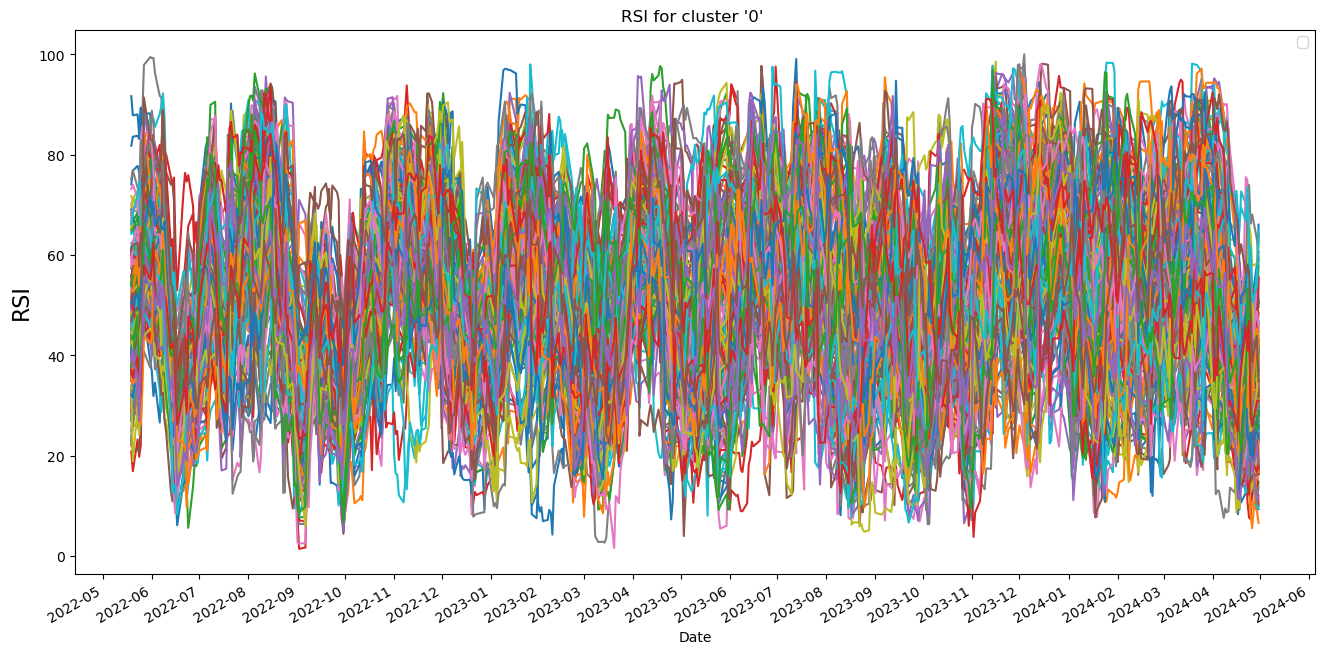

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


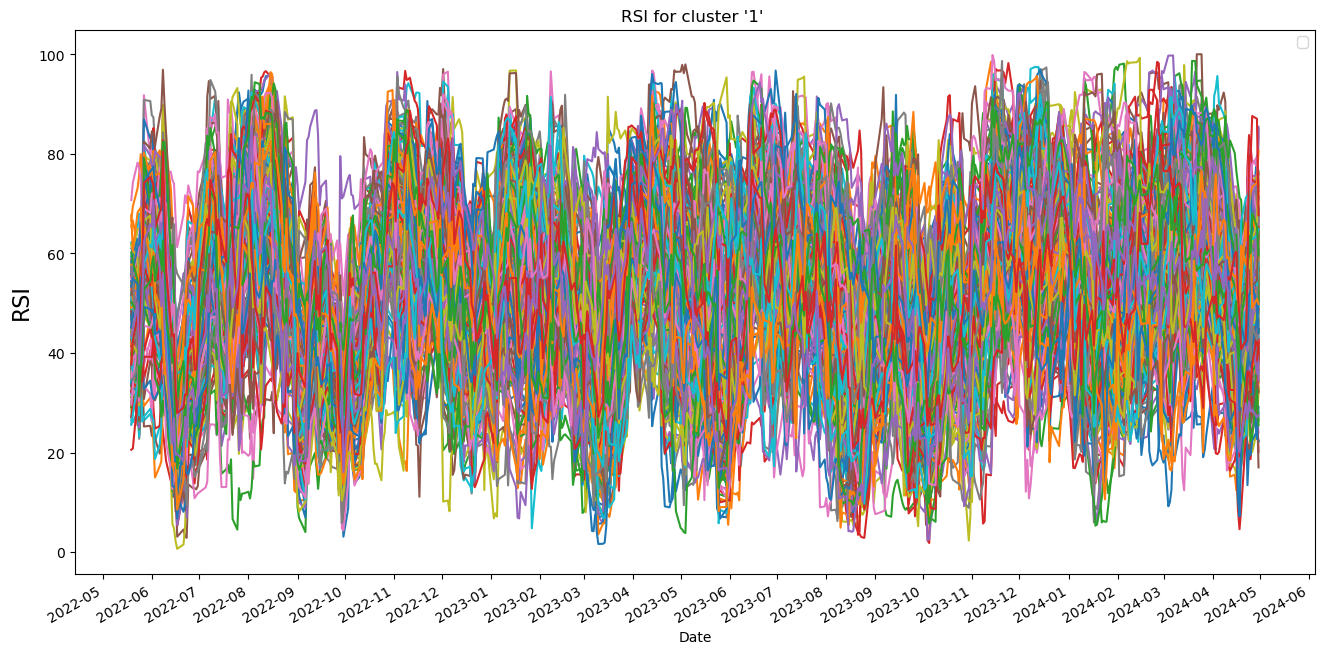

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


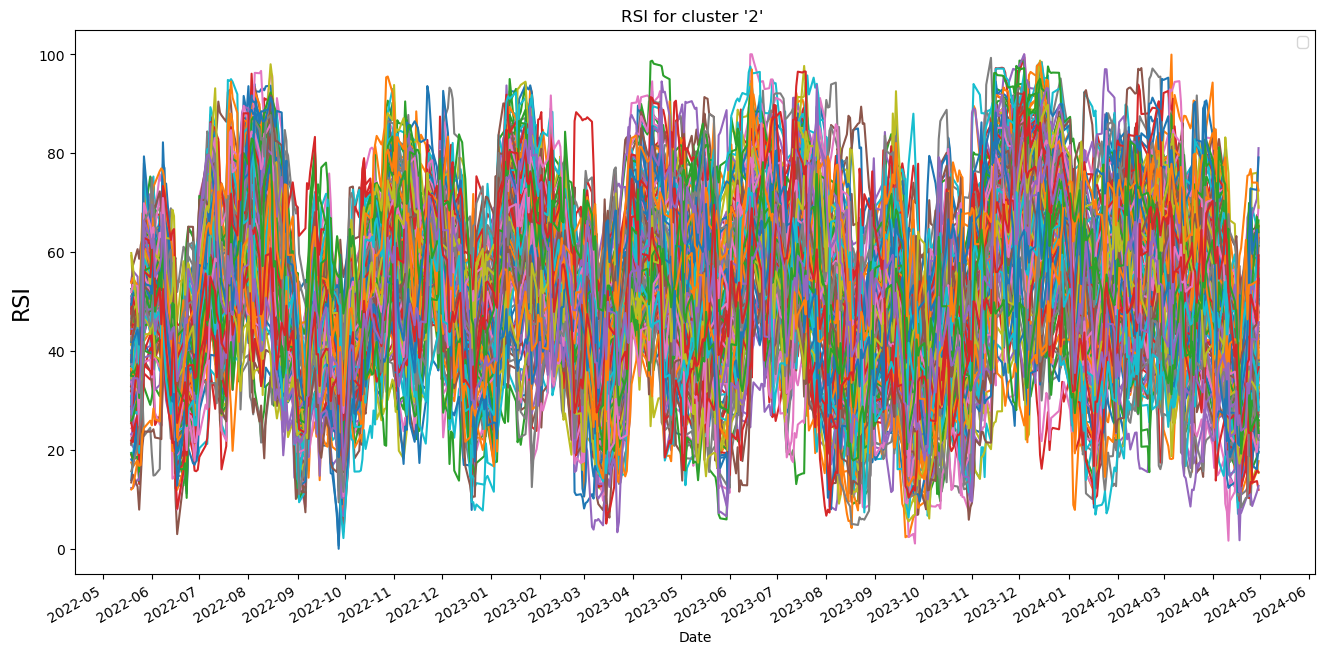

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


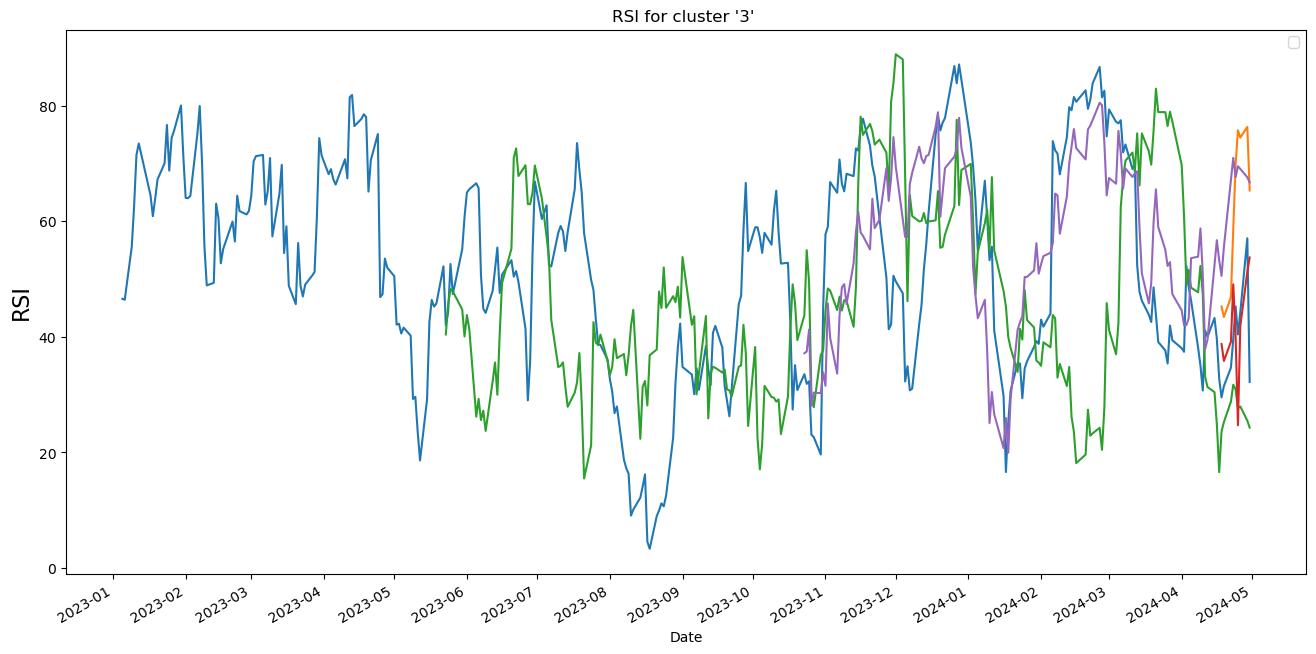

In [177]:
clusters = [c0,c1,c2,c3]

for i in range(0, 4):
    plt.figure(figsize=(16,8))
    plt.title (f"RSI for cluster '{i}' ")   
    
    for ticker in clusters[i]:
        plt.plot(d3[d3['ticker']==ticker]['Date'],
                 d3[d3['ticker']==ticker]['RSI'])
        
    # Formatting the date on the x-axis to include month and year
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at the start of each month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date to show the year and month

    plt.xlabel('Date')
    plt.ylabel('RSI', fontsize=16)
    plt.legend()
    plt.gcf().autofmt_xdate()
    #plt.savefig('../static/Images/his_'+ticker+'.png')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


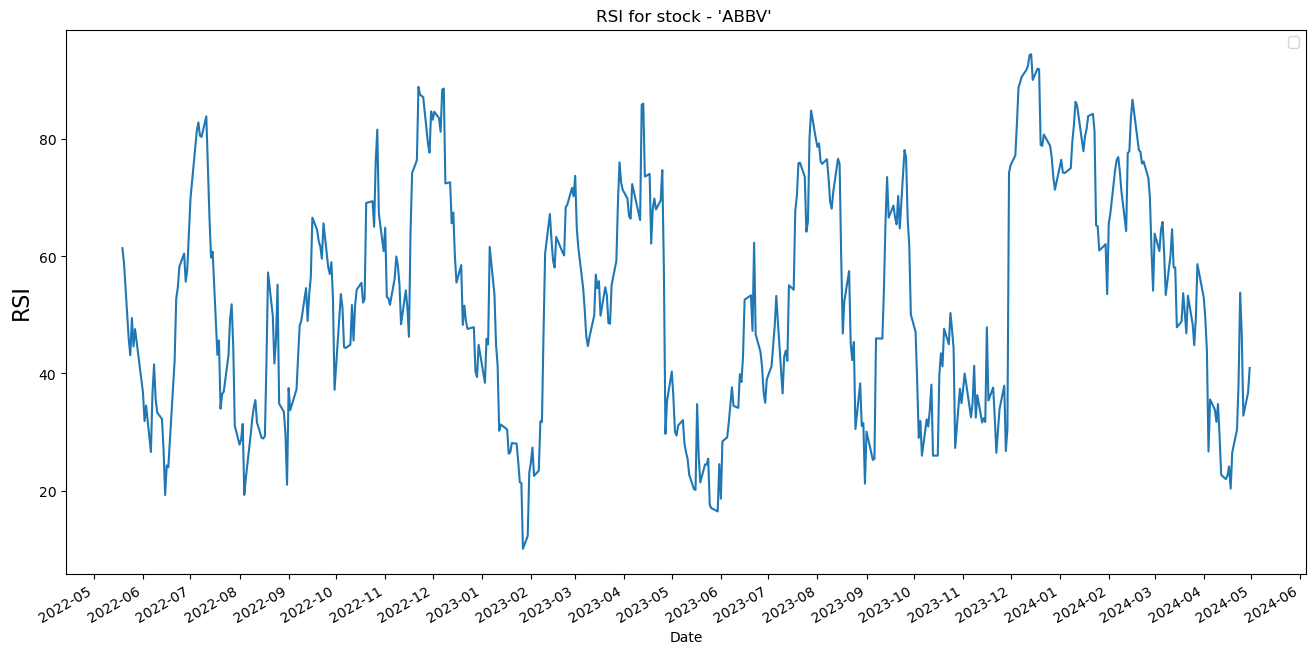

In [194]:

ticker = 'ABBV'

plt.figure(figsize=(16,8))
plt.title (f"RSI for stock - '{ticker}' ")   
    
    
plt.plot(d3[d3['ticker']==ticker]['Date'],
                 d3[d3['ticker']==ticker]['RSI'])
        
    # Formatting the date on the x-axis to include month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date to show the year and month

plt.xlabel('Date')
plt.ylabel('RSI', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


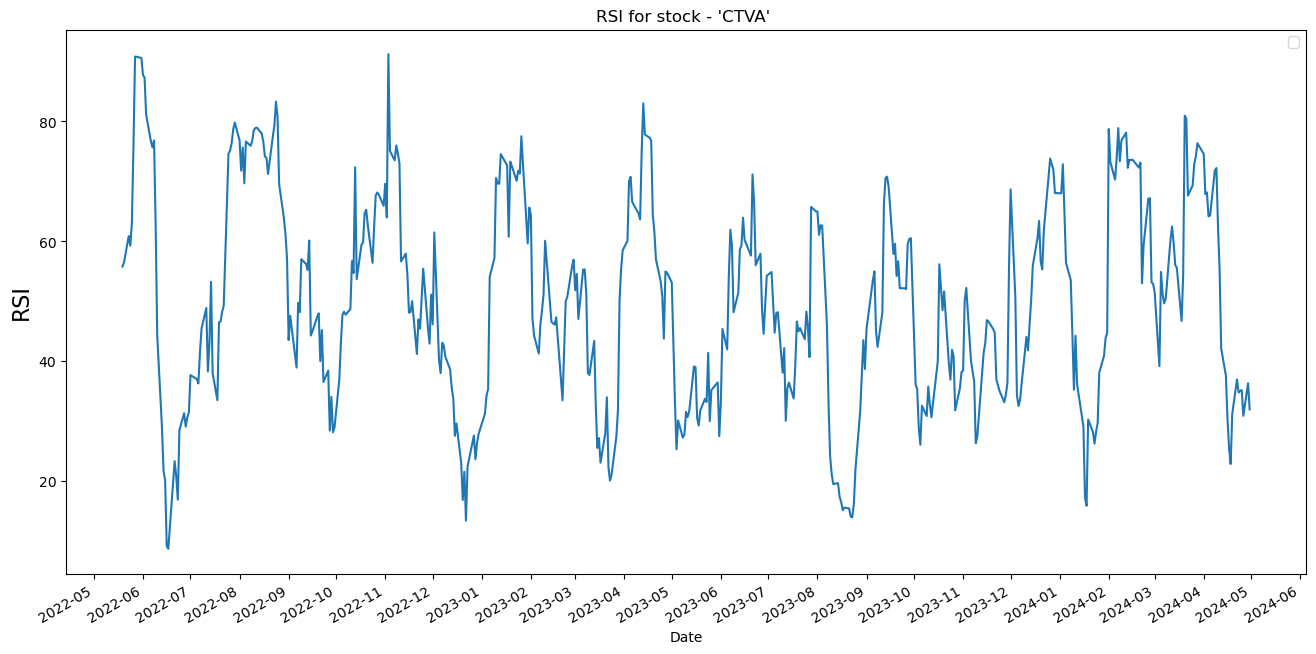

In [198]:

ticker = 'CTVA'

plt.figure(figsize=(16,8))
plt.title (f"RSI for stock - '{ticker}' ")   
    
    
plt.plot(d3[d3['ticker']==ticker]['Date'],
                 d3[d3['ticker']==ticker]['RSI'])
        
    # Formatting the date on the x-axis to include month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date to show the year and month

plt.xlabel('Date')
plt.ylabel('RSI', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


## PCA visualisation

In [41]:
data_normalized.shape

(501, 489, 1)

pca needs a 2d array as input, we need to convert data_normalized to a 2D array

In [42]:
n_samples, n_timesteps, n_features = data_normalized.shape
data_reshaped = data_normalized.reshape(n_samples, n_timesteps * n_features)

In [43]:
data_reshaped.shape

(501, 489)

labels alias clusters

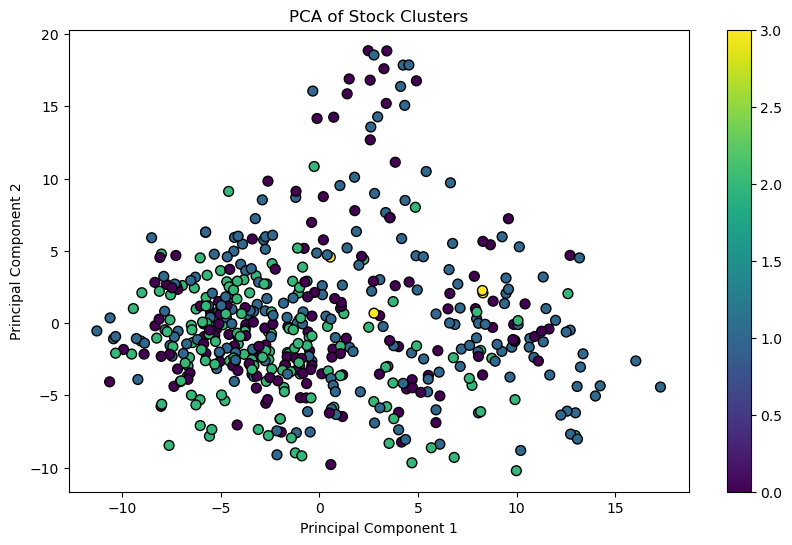

In [44]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_reshaped)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Stock Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


Observations - 
1. all colors seem to be scattered all over the place. From this plot, it doesnt seem clear if the clusters are well distuinguished from each other
2. Should look for TSNE plots

## TSNE plots

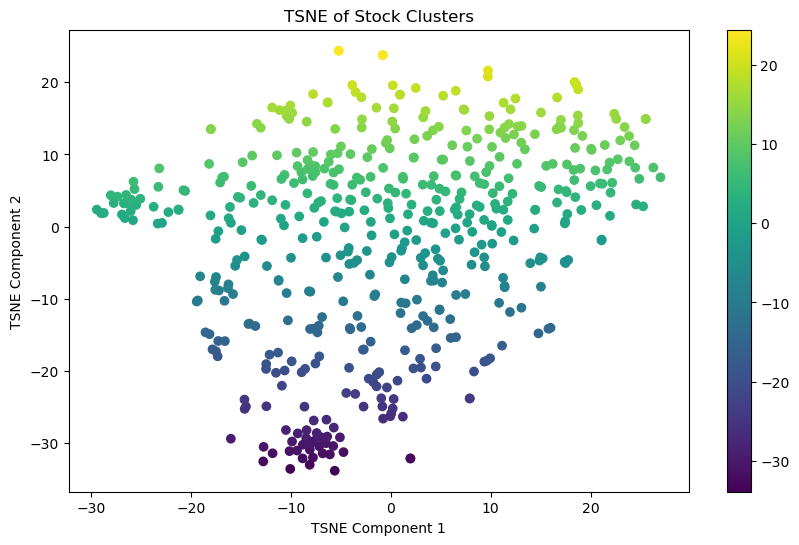

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne=tsne.fit_transform(data_reshaped)
y=X_tsne[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=y)
plt.title('TSNE of Stock Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar()
plt.show()




Observations - 
Clusters seem clearly seperable, TSNE captures non linear higher dimensional data well.

## Classify stocks as flat, up, down 

In [46]:
pivot_df = pivot_feature_df_n

In [47]:
pivot_df.reset_index()

ticker        RSI                                                         \
Date        2022-05-19 2022-05-20 2022-05-23 2022-05-24 2022-05-25 2022-05-26   
0         A  53.619853  56.647523  54.492977  47.480652  47.633064  53.480779   
1       AAL  40.109296  38.070547  37.552310  30.038759  37.791279  47.081710   
2      AAPL  32.833429  33.103895  37.313809  28.754635  34.213601  37.326309   
3      ABBV  61.370337  58.900158  45.844237  43.103556  49.456572  44.613944   
4      ABNB  28.651990  28.147742  31.341169  19.119460  27.276518  34.295715   
..      ...        ...        ...        ...        ...        ...        ...   
496     XYL  50.204621  49.763342  48.084081  31.252872  36.879533  47.654567   
497     YUM  37.612306  42.417065  47.644178  40.539408  49.931847  56.019459   
498     ZBH  43.452383  44.805191  50.231127  37.734514  43.140397  50.666676   
499    ZBRA  28.778019  29.463463  37.139115  34.099102  39.700435  45.987313   
500     ZTS  27.190034  34.510128  34.459822  31.532508  36.843795  44.927973   

                                       ...                                   \
Date 2022-05-27 2022-05-31 2022-06-01  ... 2024-04-18 2024-04-19 2024-04-22   
0     72.637609  64.376000  61.432155  ...  26.413314  26.424085  30.999999   
1     59.378236  56.728786  56.846478  ...  34.920635  35.360357  51.688313   
2     47.755081  44.574154  52.490422  ...  41.944832  41.065700  44.604299   
3     47.560939  38.857367  36.741091  ...  20.351693  26.516531  30.410278   
4     50.968957  54.274898  50.478429  ...  43.013228  39.080463  45.221194   
..          ...        ...        ...  ...        ...        ...        ...   
496   52.771780  54.428389  57.708024  ...  41.653253  46.810187  53.267504   
497   74.134108  75.371595  74.635846  ...  46.711651  40.768498  42.493163   
498   62.390983  65.861335  65.244542  ...  20.094525  22.870615  29.858522   
499   56.088048  54.910540  58.492160  ...  26.485680  24.641925  30.567277   
500   66.369745  63.035245  60.814152  ...  27.003756  23.889993  24.558101   

                                                                       cluster  
Date 2024-04-23 2024-04-24 2024-04-25 2024-04-26 2024-04-29 2024-04-30          
0     42.888536  43.824198  36.868849  38.998025  36.740234  37.621676       1  
1     50.895137  51.156814  54.590570  49.758460  50.357992  51.213597       2  
2     45.098029  50.340820  50.526325  51.470075  56.005017  53.843847       2  
3     38.494945  53.800785  46.760627  32.797726  36.748999  40.930564       0  
4     52.002986  54.810003  51.597102  55.137507  49.462361  47.831611       2  
..          ...        ...        ...        ...        ...        ...     ...  
496   56.567840  63.571493  60.051574  68.009371  65.352450  59.602185       1  
497   55.275963  79.699189  79.104302  87.600281  87.034627  67.665876       1  
498   26.790564  30.265564  28.193288  28.588057  27.099460  27.509052       1  
499   37.578635  38.298199  51.372044  50.222104  45.602511  59.351459       2  
500   33.539940  31.407292  35.056240  42.468430  42.256238  45.788118       2  

[501 rows x 491 columns]

In [53]:
pivot_df['diff'] = pivot_df.iloc[:,-2] - pivot_df.iloc[:,0]

In [55]:
conditions = [
    (pivot_df['diff']>=5),
    (pivot_df['diff']<= -5),
    ((pivot_df['diff']> -5) & (pivot_df['diff']<5 ))
]

results =['Up','Down','Flat']

pivot_df['class']=np.select(conditions, results)

In [56]:
pivot_df[['diff','class']]

diff class
Date                   
ticker                 
A      -15.998177  Down
AAL     11.104301    Up
AAPL    21.010418    Up
ABBV   -20.439773  Down
ABNB    19.179620    Up
...           ...   ...
XYL      9.397563    Up
YUM     30.053570    Up
ZBH    -15.943330  Down
ZBRA    30.573440    Up
ZTS     18.598083    Up

[501 rows x 2 columns]

In [57]:
pivot_df['class'].unique()

array(['Down', 'Up', 'Flat'], dtype=object)

In [58]:
pivot_df.groupby('class')['class'].count()

class
Down    198
Flat    102
Up      201
Name: class, dtype: int64

In [59]:
pivot_df[pivot_df['class']=='Flat']

RSI                                                         \
Date   2022-05-19 2022-05-20 2022-05-23 2022-05-24 2022-05-25 2022-05-26   
ticker                                                                     
ADI     53.118737  54.639851  52.887938  46.421610  55.872196  61.468985   
ADP     38.016518  40.077991  42.328311  33.456205  44.125070  51.579459   
AEE     53.519093  54.584479  55.664390  60.325550  65.135180  72.423285   
AEP     57.739396  60.164422  60.587646  59.991469  66.886095  67.255910   
AES     50.544285  49.467235  52.907800  44.295290  50.899264  59.233455   
...           ...        ...        ...        ...        ...        ...   
VMC     41.373206  41.203220  40.300969  30.265950  34.653432  44.848170   
VRTX    46.752472  48.369936  49.641452  47.429077  52.314864  59.214542   
VST     57.323485  52.611217  52.334603  47.768749  53.460370  46.136617   
WBA     42.355851  44.454362  48.597309  39.595413  45.315952  47.569698   
WEC     66.159040  67.984828  72.194555  74.528881  65.915515  65.904287   

                                                    ...                        \
Date   2022-05-27 2022-05-31 2022-06-01 2022-06-02  ... 2024-04-22 2024-04-23   
ticker                                              ...                         
ADI     73.130100  71.388356  70.488130  73.379473  ...  40.739130  44.505152   
ADP     67.851170  62.983900  63.278428  68.455831  ...  47.567554  53.320376   
AEE     74.712537  62.806181  55.123993  58.600862  ...  52.882673  54.452378   
AEP     67.765560  62.447240  60.125447  68.379486  ...  48.838969  54.683889   
AES     72.400753  68.638018  66.724757  74.499028  ...  36.206895  41.269811   
...           ...        ...        ...        ...  ...        ...        ...   
VMC     57.347698  53.575273  56.959752  54.106229  ...  31.638002  36.289606   
VRTX    77.465598  70.231493  76.110344  74.044780  ...  36.768834  45.158903   
VST     65.982379  64.687963  61.683552  71.100171  ...  42.197958  40.348955   
WBA     51.928800  55.586317  52.133690  53.988088  ...  42.378020  43.034029   
WEC     65.622181  64.901077  61.033185  62.227688  ...  50.347214  53.406994   

                                                              cluster  \
Date   2024-04-24 2024-04-25 2024-04-26 2024-04-29 2024-04-30           
ticker                                                                  
ADI     54.327567  53.105477  54.953096  49.769873  54.942263       1   
ADP     61.459272  53.870111  41.389296  33.388128  37.873120       0   
AEE     58.921563  60.178757  51.518060  51.701326  58.502696       1   
AEP     58.879883  60.355864  53.228969  54.990562  59.269275       1   
AES     41.269837  39.651389  37.752815  45.776036  54.207413       1   
...           ...        ...        ...        ...        ...     ...   
VMC     36.226357  32.044582  37.745654  43.210719  39.647492       1   
VRTX    45.899578  38.795918  41.084681  39.335406  43.245560       0   
VST     49.847905  43.943906  46.234673  68.160277  60.539408       1   
WBA     30.434769  24.918013  26.602615  33.040923  44.313712       0   
WEC     57.054667  61.745571  50.724619  53.780804  64.989720       0   

            diff class  
Date                    
ticker                  
ADI     1.823526  Flat  
ADP    -0.143398  Flat  
AEE     4.983604  Flat  
AEP     1.529879  Flat  
AES     3.663128  Flat  
...          ...   ...  
VMC    -1.725714  Flat  
VRTX   -3.506911  Flat  
VST     3.215923  Flat  
WBA     1.957860  Flat  
WEC    -1.169320  Flat  

[102 rows x 492 columns]

# Evaluation of threshold based clusters

In [60]:
pivot_df.dtypes

         Date      
RSI      2022-05-19    float64
         2022-05-20    float64
         2022-05-23    float64
         2022-05-24    float64
         2022-05-25    float64
                        ...   
         2024-04-29    float64
         2024-04-30    float64
cluster                  int64
diff                   float64
class                   object
Length: 492, dtype: object

In [61]:
data = pivot_df

In [62]:
# Separate features from class labels
features = data.drop('class', axis=1)
labels = data['class']

In [74]:
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [75]:
scaler = TimeSeriesScalerMinMax()  # Rescale time series
data_class_normalized = scaler.fit_transform(features.values)

In [76]:
# Calculate centroids of each class
def compute_centroids(features, labels):
    centroids = features.groupby(labels).mean()
    return centroids

# Compute centroids
centroids = compute_centroids(features, labels)


In [77]:

# Function to calculate WCSS
def compute_wcss(features, labels, centroids):
    wcss = 0
    for label, center in centroids.iterrows():
        # Points in the current cluster
        points = features[labels == label]
        # Compute squared distances from the cluster centroid
        wcss += ((points - center) ** 2).sum().sum()  # summing all feature dimensions
    return wcss



In [78]:
# Compute WCSS using the class labels
wcss = compute_wcss(features, labels, centroids)
print("WCSS for the manually labeled clusters is:", wcss)

WCSS for the manually labeled clusters is: 50819908.59039472


# End of Code